## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Reading images

In [2]:
img1=cv2.imread('number plate 1.jpg')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.imread('number plate 2.jpg')
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

## Previewing images

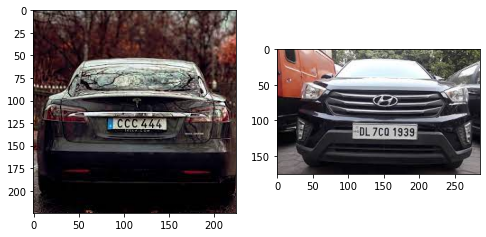

In [3]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

In [5]:
pwd

'C:\\Users\\meghn\\Downloads\\number_plate _project'

## Haar cascade Classifier

In [4]:
plate_cascade=cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [5]:
plate_img=img2.copy()
plate_cascade.detectMultiScale(plate_img,minNeighbors =3)

array([[100,  94, 121,  40]])

In [6]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,minNeighbors =3) 
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (255,0,0), 3) 
    return plate_img

## Detecting number plates

In [ ]:
detected_img1=detect_plate(img1)

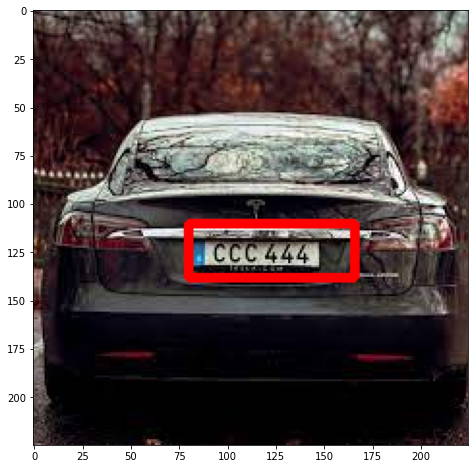

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(detected_img1)

In [9]:
detected_img2=detect_plate(img2)

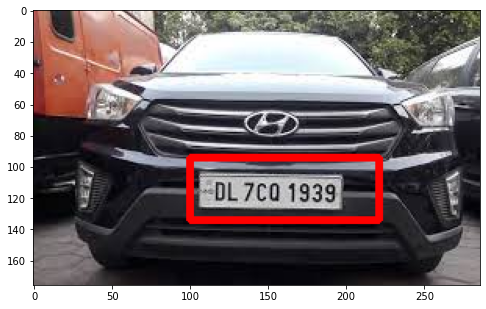

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(detected_img2)

## Extracting number plates alone

In [11]:
def extract_plate(img):
    plate_Rects=plate_cascade.detectMultiScale(img,minNeighbors=4)
    for x,y,w,h in plate_Rects:
        plate_image=img[y+8:y+h-7,x+10:x+w-20]
    return plate_image

In [12]:
img1_extracted=extract_plate(img1)

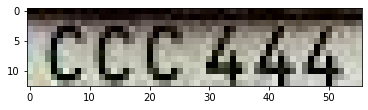

In [13]:
plt.imshow(extract_plate(img1))

In [14]:
img2_extracted=extract_plate(img2)

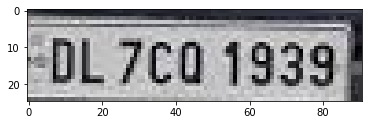

In [15]:
plt.imshow(extract_plate(img2))

## Noise cancellation using any blur method

In [16]:
noiseless_img1=cv2.bilateralFilter(img1_extracted,50,200,200)

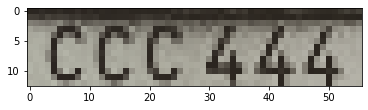

In [17]:
plt.imshow(noiseless_img1)

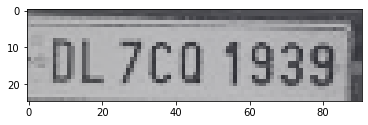

In [18]:
noiseless_img2=cv2.bilateralFilter(img2_extracted,50,200,150)
plt.imshow(noiseless_img2)

In [19]:
noiseless_img1.shape

(13, 56, 3)

In [20]:
noiseless_img2.shape

(25, 91, 3)

In [21]:
numplate1=cv2.resize(noiseless_img1,(100,50))
numplate2=cv2.resize(noiseless_img2,(100,50))

In [23]:
numplate1.shape,numplate2.shape

((50, 100, 3), (50, 100, 3))

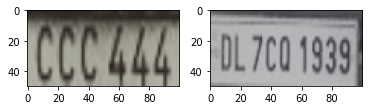

In [24]:
plt.subplot(1,2,1)
plt.imshow(numplate1)
plt.subplot(1,2,2)
plt.imshow(numplate2)

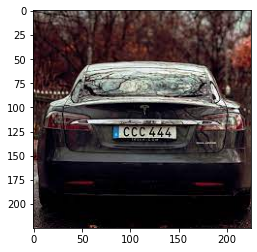

In [25]:
plt.imshow(img1)

In [26]:
img1.shape

(225, 225, 3)

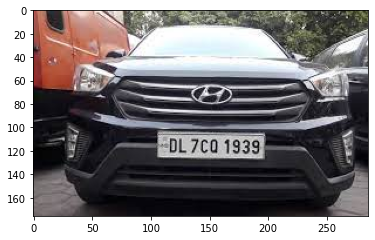

In [27]:
plt.imshow(img2)

In [28]:
img2.shape,img1.shape

((176, 286, 3), (225, 225, 3))

In [34]:
car1=img1.copy()
car2=img2.copy()

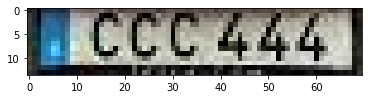

In [35]:
plt.imshow(img1[120:134,80:150])

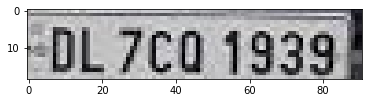

In [26]:
plt.imshow(img2[105:124,110:201])

## Region of interest

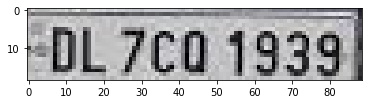

In [36]:
roi2=img2[105:124,110:199]
plt.imshow(roi2)

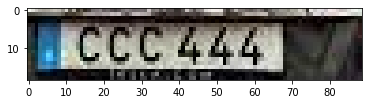

In [37]:
roi1=img1[116:135,80:169]
plt.imshow(roi1)

In [38]:
car1[116:135,80:169]=swap2  ## pasting phase of number plate 2 to car1

In [39]:
car2[105:124,110:199]=roi1

In [40]:
swap2=img2[105:124,110:199]
swap1=img1[116:135,80:169]

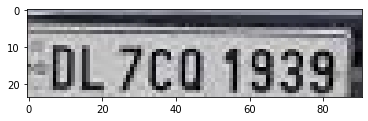

In [41]:
plt.imshow(img2[100:124,110:201])

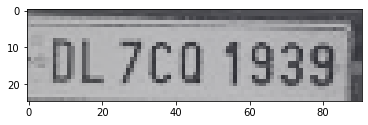

In [42]:
plt.imshow(noiseless_img2)

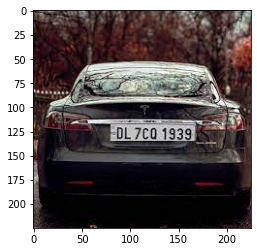

In [43]:
plt.imshow(car1)

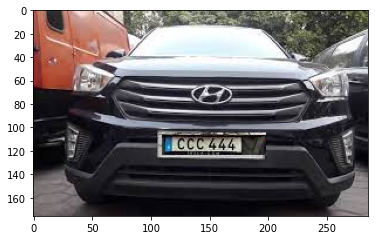

In [44]:
plt.imshow(car2)

## Swapped number plates

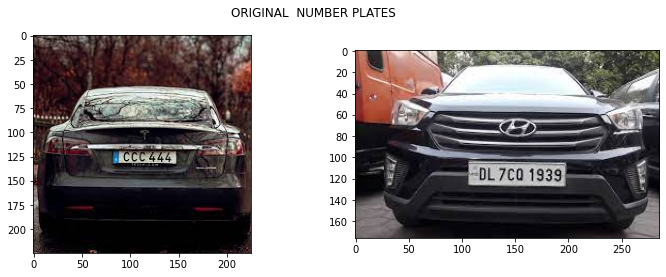

In [48]:
plt.figure(figsize=(12,4))
plt.suptitle('ORIGINAL  NUMBER PLATES')
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

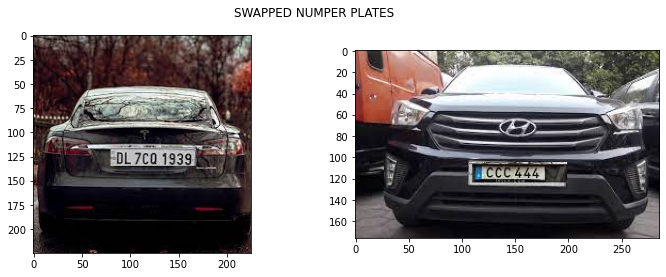

In [47]:
plt.figure(figsize=(12,4))
plt.suptitle('SWAPPED NUMPER PLATES')
plt.subplot(1,2,1)
plt.imshow(car1)
plt.subplot(1,2,2)
plt.imshow(car2)
plt.show()